# GBENGA ILESANMI - Assignment – 771766 Fundamentals of Data Science PROJECT

# STUDENT NUMBER: 202173945
# STUDENT CODE: 699610

## LIBRARIES IMPORTING

In [1]:
#import all necessary libraries

import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## DATA LOADING, CLEANING, AND PREPROCESSING

In [2]:
#load in the data using the Pandas library and make a copy

census_data = pd.read_csv('census_09_2022.csv')

census=census_data.copy()

In [3]:
#this drops the unwanted and non-useful column in the raw dataset
census=census.drop('Unnamed: 0',axis=1)
census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,April Lodge,Brett,Webb,69,Head,Widowed,Male,Retired Customer service manager,None,Christian
1,2,April Lodge,Matthew,Hill,82,Head,Married,Male,Retired English as a second language teacher,None,Christian
2,2,April Lodge,Cheryl,Hill,80,Wife,Married,Female,Retired IT technical support officer,None,Christian
3,3,April Lodge,Louis,Scott,33,Head,Married,Male,Control and instrumentation engineer,None,None
4,3,April Lodge,Shannon,Scott,29,Wife,Married,Female,"Psychologist, prison and probation services",None,None
...,...,...,...,...,...,...,...,...,...,...,...
11291,1,Williams Hold,Mark,Holmes,53,Lodger,Single,Male,Chief Strategy Officer,None,Christian
11292,1,Williams Hold,Tony,Field,33,Lodger,Widowed,Male,"Therapist, art",None,Catholic
11293,1,Williams Hold,Melanie,Roberts,59,Lodger,Single,Female,Marketing executive,None,Christian
11294,1,Williams Hold,Sally,Chapman,53,Lodger,Single,Female,Medical physicist,None,Christian


In [4]:
#view the unique values in the column
census['Age'].unique()

array(['69', '82', '80', '33', '29', '55', '38', '28', '47', '39', '8',
       '6', '20', '23', '43', '63', '57', '19', '32', '22', '41', '44',
       '14', '58', '24', '51', '48', '30', '27', '5', '74', '73', '71',
       '75', '15', '42', '46', '2', '49', '17', '62', '61', '31', '78',
       '25', '68', '66', '18', '7', '40', '36', '12', '16', '35', '34',
       '1', '10', '59', '13', '9', '64', '50', '81', '56', '4', '26',
       '54', '11', '67', '53', '52', '21', '65', '3', '0', '72', '76',
       '75.52556518', '77.52556518', '37', '45', '77', '98', '96', '95',
       '60', '87', '89', '70', '84', '79', '83', '85', '94', '104', '88',
       '93', '58.88726261', '59.88726261', '81.44251982', '79.44251982',
       '102', '110', '97', '86', '53.34938183', '49.34938183', '91',
       '61.19850225', '63.19850225', '68.8413422', '101', '92',
       '73.77655042', '74.77655042', 'Twenty', '99', '103', '90', '105',
       '50.65178976', '76.35586495', '77.35586495'], dtype=object)

In [5]:
census['Age']=census['Age'].replace({'Twenty':'20'}) #convert 20 in words to figures
census['Age']=census['Age'].astype(float) # change the whole column to float for uniformity
census['Age']=census['Age'].apply(np.int64) #convert all the numbers in string to integer types

In [6]:
census['Age'].unique() #new look of age column

array([ 69,  82,  80,  33,  29,  55,  38,  28,  47,  39,   8,   6,  20,
        23,  43,  63,  57,  19,  32,  22,  41,  44,  14,  58,  24,  51,
        48,  30,  27,   5,  74,  73,  71,  75,  15,  42,  46,   2,  49,
        17,  62,  61,  31,  78,  25,  68,  66,  18,   7,  40,  36,  12,
        16,  35,  34,   1,  10,  59,  13,   9,  64,  50,  81,  56,   4,
        26,  54,  11,  67,  53,  52,  21,  65,   3,   0,  72,  76,  77,
        37,  45,  98,  96,  95,  60,  87,  89,  70,  84,  79,  83,  85,
        94, 104,  88,  93, 102, 110,  97,  86,  91, 101,  92,  99, 103,
        90, 105], dtype=int64)

In [7]:
def age_category(age):
    if age<11:
        return '0-10'
    elif age<21:
        return '11-20'
    elif age<31:
        return '21-30'
    elif age<41:
        return '31-40'
    elif age<51:
        return '41-50'
    elif age<61:
        return '51-60'
    elif age<71:
        return '61-70'
    elif age<81:
        return '71-80'
    elif age<91:
        return '81-90'
    elif age>90:
        return '90 +'

census['Age Category']=census['Age'].apply(age_category) #create new column and apply the age category funtion to the column

In [8]:
census['Marital Status'].unique() #view unique values in marital status

array(['Widowed', 'Married', 'Single', nan, 'Divorced', 'W', 'S', 'D',
       'M'], dtype=object)

In [9]:
census['Marital Status'].value_counts(dropna=False) #view the value counts plus all Nans

Single      3995
NaN         2888
Married     2878
Divorced    1103
Widowed      409
W              7
S              7
M              6
D              3
Name: Marital Status, dtype: int64

In [10]:
len(census.loc[(census['Marital Status'].isnull()) & (census['Age']<18)]) #checking the ages of all the null figures

2888

In [11]:
census['Marital Status']=census['Marital Status'].replace({'W':'Widowed',
                                                           'S':'Single',
                                                           'M':'Married',
                                                           'D':'Divorced'}) #replace all the non-conforming entries with the correct entries
census['Marital Status'].fillna('NA',inplace=True) #fill Nans with NA as theyre all minors

In [12]:
#further cleaning --- set all below marrying age to NA
census.loc[(census['Marital Status']=='Married') & 
           (census['Age']<18),'Marital Status']='NA'
census.loc[(census['Marital Status']=='Divorced') & 
           (census['Age']<18),'Marital Status']='NA'
census.loc[(census['Marital Status']=='Widowed') & 
           (census['Age']<18),'Marital Status']='NA'
census.loc[(census['Marital Status']=='Single') & 
           (census['Age']<18),'Marital Status']='NA'

In [13]:
census['Marital Status'].value_counts() #new look of the marital status category

Single      4002
NA          2889
Married     2883
Divorced    1106
Widowed      416
Name: Marital Status, dtype: int64

In [14]:
census['Religion'].unique() #view the unique values in the religion column

array(['Christian', 'None', 'Methodist', nan, 'Catholic', 'Sikh',
       'Muslim', 'Jewish', ' ', 'Jedi', 'Orthodoxy', 'Housekeeper',
       'Undecided', 'Agnostic', 'Bahai'], dtype=object)

In [15]:
census['Religion'].value_counts(dropna=False) # views the value counts of the unique values of the column

None           3741
NaN            2947
Christian      2426
Catholic       1158
Methodist       768
Muslim          142
Sikh             72
Jewish           29
Jedi              4
Housekeeper       4
                  1
Orthodoxy         1
Undecided         1
Agnostic          1
Bahai             1
Name: Religion, dtype: int64

In [16]:
len(census.loc[(census['Religion'].isnull()) & 
           (census['Age']<18),'Religion']) # a filter of null values in the column who are also under 18

2889

In [17]:
census.loc[(census['Religion'].isnull()) & 
           (census['Age']<18),'Religion']='Child - no religion' # converting the found null minor values to 'child, no religion' they are minors

In [18]:
census[census['Religion'].isnull()] # a view of the 58 remaining null values who are not minors. They will now be converted to the mode

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Category
147,29,Brown Cove,Lorraine,Lawson,18,Head,Divorced,Female,Student,None,NaN,11-20
182,40,Brown Cove,Roy,Henderson,18,Head,Married,Male,Student,None,NaN,11-20
183,40,Brown Cove,Gemma,Henderson,19,Wife,Married,Female,University Student,None,NaN,11-20
851,16,Lavendar Oval,Nicola,Hargreaves,18,Head,Married,Female,Student,None,NaN,11-20
852,16,Lavendar Oval,Clive,Hargreaves,20,Husband,Married,Male,University Student,None,NaN,11-20
1100,42,Dean Mews,Michael,Reid,18,Head,Single,Male,Student,None,NaN,11-20
1952,8,Holyrood Lane,Sylvia,Bevan,18,None,Single,Female,Student,None,NaN,11-20
2257,44,Holyrood Lane,Donald,Ellis,18,Lodger,Single,Male,Student,None,NaN,11-20
2260,45,Holyrood Lane,Jasmine,Pearson,21,None,Single,Female,University Student,None,NaN,21-30
2370,25,Jenkins Lane,Philip,Fisher,18,Head,Single,Male,Student,None,NaN,11-20


In [19]:
census['Religion']=census['Religion'].fillna('None') #null converted to mode
census['Religion']=census['Religion'].replace({'Housekeeper':"None",
                                               ' ':'None',
                                               'Jedi':'None'}) # joke, blank and mock religions converted to mode

In [20]:
census['Religion'].value_counts()# new look of the religion column

None                   3808
Child - no religion    2889
Christian              2426
Catholic               1158
Methodist               768
Muslim                  142
Sikh                     72
Jewish                   29
Orthodoxy                 1
Undecided                 1
Agnostic                  1
Bahai                     1
Name: Religion, dtype: int64

In [21]:
census['Gender'].unique() # a view of the unique values in gender. we should have just 2. Male and Female

array(['Male', 'Female', 'M', 'F', 'male', 'female', 'f', 'm', ' '],
      dtype=object)

In [22]:
census['Gender']=census['Gender'].replace({'M':'Male',
                                           'F':'Female',
                                           'male':'Male',
                                           'female':'Female',
                                           'f':'Female',
                                           'm':'Male',
                                           ' ':None})  # replacing the inconsistent entries with the correct entry. blanks converted to nonetype

In [23]:
census.loc[(census['Gender'].isnull())] # checking the nonetype values. they have male specific names. they will be converted to males

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Category
1554,22,Grant Avenue,Damian,Morgan,13,Son,NA,None,Student,None,Child - no religion,11-20
2680,144,Jenkins Lane,Craig,Nelson,37,None,Single,None,Hydrologist,None,Christian,31-40
5203,7,Wood Harbors,Charles,Roberts,38,Partner,Single,None,Lawyer,None,None,31-40


In [24]:
census['Gender']=census['Gender'].replace({None:'Male'})  # nonetypes converted to males

In [25]:
census['Gender'].value_counts() # new look of the gender column

Female    5875
Male      5421
Name: Gender, dtype: int64

In [26]:
census['Infirmity'].value_counts(dropna=False) # a view of the infirmity column shows 7 blanks

None                   11214
Physical Disability       26
Unknown Infection         13
Blind                     12
Mental Disability         11
                           7
Disabled                   7
Deaf                       6
Name: Infirmity, dtype: int64

In [27]:
census['Infirmity']=census['Infirmity'].replace({' ':'None'})  # 7 blanks converted to the mode

In [28]:
census['House Number'].unique()  # a view of the unique values of the house number column

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [29]:
census['House Number']=census['House Number'].replace('One','1')  # an inconsistent value, converted to conform with the rest of the data
census['House Number']=census['House Number'].astype(int)  # the column values changes to type integers as they should be numbers

In [30]:
census['Occupation'].value_counts()  # view of the 1128 unique values of different occupations.

Student                              2319
University Student                    724
Child                                 712
Unemployed                            694
Theatre manager                        20
                                     ... 
Retired Curator                         1
Retired Electrical engineer             1
Retired Child psychotherapist           1
Retired Teacher, secondary school       1
Retired Marketing executive             1
Name: Occupation, Length: 1128, dtype: int64

In [31]:
 # cloning the occupation column
census['Occupation Category']=census.loc[:,'Occupation']  # the column has to be re-categorised, but we need to still have record of the original occupation.

In [32]:
 # new cloned column values are recategorised based on string values found in them.
census.loc[census['Occupation Category'].str.contains('Retired'),
           'Occupation Category']='Retired' 
census.loc[census['Occupation Category'].str.fullmatch('PhD Student'),
           'Occupation Category']='University Student'

census.loc[~census['Occupation Category'].str.contains('Student') & 
           ~census['Occupation Category'].str.fullmatch('Retired') &
           ~census['Occupation Category'].str.fullmatch('Unemployed') &
           ~census['Occupation Category'].str.fullmatch('Child'),
           'Occupation Category'] ='Employed'

In [33]:
census['Occupation Category'].unique() # easier look of the occupation category column 

array(['Retired', 'Employed', 'Student', 'Unemployed',
       'University Student', 'Child'], dtype=object)

In [34]:
census.loc[(census['Occupation Category']=='Employed') & 
           (census['Age']<18),'Occupation Category'].describe() # checking for people listed as employed but below working age

count            2
unique           1
top       Employed
freq             2
Name: Occupation Category, dtype: object

In [35]:
census.loc[(census['Occupation Category']=='Unemployed') & 
           (census['Age']>65),'Occupation Category'].describe()  # checking for people listed unemployed though they're above retirement age

count             55
unique             1
top       Unemployed
freq              55
Name: Occupation Category, dtype: object

In [36]:
census.loc[(census['Occupation Category']=='Employed') & 
           (census['Age']<18),'Occupation Category']='Child'
census.loc[(census['Occupation Category']=='Unemployed') & 
           (census['Age']>65),'Occupation Category']='Retired' # converting the sought out values to appropriate categories

In [37]:
census['Address']=census.loc[:,'House Number'] # created a new column. a clone of house number column
census['Address']=census['House Number'].astype(str) +' '+ census['Street'] # concatenating house number and street to make address column

In [38]:
census['Relationship to Head of House'].value_counts(dropna=False)  # view of the relationship to head of house unique values

Head                3501
Son                 2174
Daughter            2042
Husband             1064
None                 784
Lodger               577
Wife                 367
Partner              302
Granddaughter        121
Grandson             112
Sibling               73
Cousin                41
Step-Daughter         29
Visitor               28
Adopted Daughter      28
Adopted Son           18
Step-Son              16
Neice                  9
Nephew                 8
                       1
Daughter-in-law        1
Name: Relationship to Head of House, dtype: int64

In [39]:
census['Relationship to Head of House']=census['Relationship to Head of House'].replace({'Neice':'Niece',
                                                                                         ' ':'None'}) # correcting spelling error and assigning 11 case of blank to mode

In [40]:
census['Relationship to Head of House'].unique()  # new look of the unique values of the column

array(['Head', 'Wife', 'Lodger', 'Daughter', 'Son', 'Visitor', 'None',
       'Partner', 'Husband', 'Grandson', 'Adopted Son', 'Granddaughter',
       'Step-Daughter', 'Step-Son', 'Cousin', 'Nephew', 'Sibling',
       'Adopted Daughter', 'Niece', 'Daughter-in-law'], dtype=object)

In [41]:
census.loc[(census['Relationship to Head of House']=='Head') & 
           (census['Age']<18)]  # checking for underage heading houses found 1

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Category,Occupation Category,Address
6840,50,Truro Walks,Annette,Clarke,15,Head,NA,Female,Student,None,Child - no religion,11-20,Student,50 Truro Walks


In [42]:
census.loc[(census['Relationship to Head of House']=='Head') & 
           (census['Age']<18),
           'Relationship to Head of House']='None'  # recategorised to mode

In [43]:
census['Occupants']=census.apply(lambda i:len(census[(census['Address']==i['Address'])]),
                                 axis=1) 
# creating a new column occupants by applying a length of the count of the unique houses

In [44]:
population_all=(len(census))  # creates a length of the entire population

In [45]:
birth_rate = (len(census.loc[(census['Age']==0)])/population_all)*1000
birth_rate # calculation of the population birth rate

12.305240793201133

In [46]:
aged_5 = len(census.loc[(census['Age']==5)])
aged_over_5 = len(census.loc[(census['Age']>5)])

aged_5/aged_over_5*1000 # calculation of the population birthrate over the last 5 years

13.793103448275861

In [47]:
immi = len(census.loc[(census['Marital Status']=='Single') & 
                  census['Relationship to Head of House'].isin(['Visitor','Lodger'])])

population_all=(len(census))

immi_rate = (immi/population_all)*1000
immi_rate# calculation of the population immigration rate

40.63385269121813

In [48]:
# to view females who are divorced but are heading their households. evidence that their divorced partners leave the house to other towns/cities after divorce
census.loc[(census['Marital Status']=='Divorced') & 
                  (census['Occupation Category']=='Employed') &
                  (census['Gender']=='Female') &
                  (census['Relationship to Head of House']=='Head')] 


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Category,Occupation Category,Address,Occupants
157,32,Brown Cove,Sara,Simpson,36,Head,Divorced,Female,Archivist,None,None,31-40,Employed,32 Brown Cove,1
167,36,Brown Cove,Lauren,Kennedy,57,Head,Divorced,Female,"Conservation officer, historic buildings",None,Catholic,51-60,Employed,36 Brown Cove,5
188,42,Brown Cove,Emily,Ward,65,Head,Divorced,Female,Hotel manager,None,Methodist,61-70,Employed,42 Brown Cove,3
258,21,Reindeer Canyon,Harriet,Henderson,36,Head,Divorced,Female,Sports therapist,None,None,31-40,Employed,21 Reindeer Canyon,2
343,7,Coronation Turnpike,Gillian,Page,52,Head,Divorced,Female,Computer games developer,None,Christian,51-60,Employed,7 Coronation Turnpike,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,18,Gill Road,Marie,Evans,30,Head,Divorced,Female,Quality manager,None,Christian,21-30,Employed,18 Gill Road,2
11046,19,Gill Road,Jessica,Kaur,44,Head,Divorced,Female,Tourism officer,None,None,41-50,Employed,19 Gill Road,5
11062,24,Gill Road,Emily,Stone,39,Head,Divorced,Female,Broadcast presenter,None,None,31-40,Employed,24 Gill Road,2
11110,43,Gill Road,Abbie,Perry,46,Head,Divorced,Female,Cytogeneticist,None,Christian,41-50,Employed,43 Gill Road,2


In [49]:
div_males = len(census.loc[(census['Marital Status']=='Divorced') & 
                  (census['Gender']=='Male')])
div_females = len(census.loc[(census['Marital Status']=='Divorced') & 
                  (census['Gender']=='Female')])

net_divorced = div_females-div_males

emmi = (net_divorced/population_all)*1000
emmi# calculation of the population emmigration rate based on net divorce counts

17.88243626062323

In [50]:
age_count=pd.crosstab(census['Age Category'],len(census)) # creating a table of age actegory against total population
decline_age = ((age_count.loc['61-70',]-age_count.loc['71-80',])+
               (age_count.loc['71-80',]-age_count.loc['81-90',])+
               (age_count.loc['81-90',]-age_count.loc['90 +',]))/10  # finiding the difference between latter age bands and prorate by 10


population_all=(len(census))
death_rate = round((decline_age/population_all)*1000)

death_rate # calculating thee death rate by summing the differences in the latter ages


col_0
11296    7.0
dtype: float64

In [51]:
rand_occ = census['Occupation'].sample(n=50)  # random sampling of occupations in the town
rand_occ.to_frame()

,Occupation
5825,Retired Advice worker
7205,Geophysicist/field seismologist
5482,Student
6960,Child
8492,Aeronautical engineer
7427,Museum/gallery exhibitions officer
506,University Student
2272,Customer service manager
8070,"Editor, magazine features"
1848,"Editor, magazine features"


In [52]:
 # a claculation of the enemployment rate
employable_age=len(census.loc[(census['Age']>17) & (census['Age']<67)]) #  calculation of employable age
unempl_pop=len(census.loc[(census['Occupation Category']=='Unemployed')]) # calculation of unemployed people
unempl_rate=(unempl_pop/employable_age)*100
unempl_rate

8.591019091153536

In [53]:
 # occupancy
    
unique_houses=len(census['Address'].unique())
occupants_mean=round(census['Occupants'].mean())
ppl_living_over_5 = len(census.loc[(census['Occupants']>occupants_mean)])
ppl_living_over_5_pcnt = round((ppl_living_over_5/len(census))*100,1)

above_avr=len([i for i in census['Address'].value_counts() if 
               i>round(census['Occupants'].mean())])

 # occupancy statistics

print(f"There are {unique_houses} houses in the town")
print(f"We have maximum of {census['Occupants'].max()} people living in a house")
print(f"We have minimum of {census['Occupants'].min()} person living in a house")
print(f"On an average, about {occupants_mean} people occupy a house in the town")
print(f"{above_avr} houses have more than 5 people living in them.")
print(f"{ppl_living_over_5} people live in houses that have more than 5 people. This is {ppl_living_over_5_pcnt}% of the overall population")





There are 3501 houses in the town
We have maximum of 22 people living in a house
We have minimum of 1 person living in a house
On an average, about 5 people occupy a house in the town
278 houses have more than 5 people living in them.
2437 people live in houses that have more than 5 people. This is 21.6% of the overall population


## VISUALISATIONS

In [54]:
age_count=census['Age Category'].value_counts().to_frame()
age_count=age_count.rename(columns={'Age Category':'Counts'})

age_count # creating a table of age distribution in the population

,Counts
31-40,1772
11-20,1738
0-10,1717
41-50,1707
21-30,1626
51-60,1219
61-70,813
71-80,476
81-90,175
90 +,53


In [55]:
head_of_house_occupation=pd.crosstab(census['Relationship to Head of House'],census['Occupation Category'])
head_of_house_occupation # a cross table of relationship to head of house by differentt occupations

Occupation Category,Child,Employed,Retired,Student,Unemployed,University Student
Relationship to Head of House,,,,,,
Adopted Daughter,2,10,0,14,0,2
Adopted Son,3,4,0,10,0,1
Cousin,0,36,1,0,1,3
Daughter,311,572,5,975,36,143
Daughter-in-law,0,1,0,0,0,0
Granddaughter,20,8,0,81,0,12
Grandson,22,11,0,71,1,7
Head,0,2323,633,26,374,144
Husband,0,792,195,0,65,12


In [56]:
%matplotlib inline

num_male=[]  # creates a list of counts of males in population per age category
num_female=[]  # creates a list of counts of females in population per age category

for i in census['Age Category'].unique():
    m = len(census.loc[(census['Gender']=='Male') & 
                       (census['Age Category']==i)]) # loops through age category unique values and seek out males
    f = len(census.loc[(census['Gender']=='Female') & 
                       (census['Age Category']==i)]) # loops through age category unique values and seek out females

    num_male.append(-m) # append to list
    num_female.append(f) # append to list

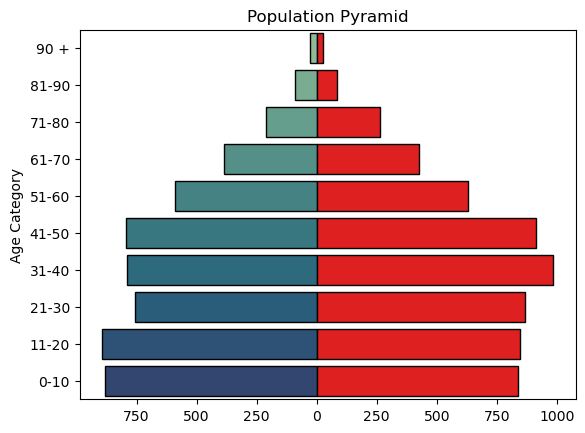

In [57]:
age_gender_fig = pd.DataFrame({'Age Category': census['Age Category'].unique(), 
                               'Male': num_male, 
                               'Female': num_female})  # create dataframe of needed data

xlist=['1000','750','500','250','0','250','500','750','1000','1250']
ages = ['90 +','81-90','71-80','61-70','51-60','41-50','31-40','21-30','11-20','0-10']

bar_plot = sns.barplot(x='Male', y='Age Category', data=age_gender_fig, order=ages,palette='crest',edgecolor='black')  # set male chart
bar_plot = sns.barplot(x='Female', y='Age Category', data=age_gender_fig, order=ages,color='r',edgecolor='black') # set female chart
bar_plot.set(xlabel='', ylabel='Age Category', title = 'Population Pyramid') # label the diagram and y axis
bar_plot.set_xticklabels(xlist) # label the x axis

plt.show()

In [58]:
 # create table of population against percentage distribution and their median ages
age_median=census['Age Category'].value_counts().to_frame()
age_median=age_median.rename(columns={'Age Category':'Total Population'})
age_median['Percentage']=round((age_median['Total Population']/age_median['Total Population'].sum())*100,1)
age_median['Median Age']=census.groupby(['Age Category'])['Age'].median().to_frame()

age_median

,Total Population,Percentage,Median Age
31-40,1772,15.7,36.0
11-20,1738,15.4,16.0
0-10,1717,15.2,6.0
41-50,1707,15.1,45.0
21-30,1626,14.4,25.0
51-60,1219,10.8,55.0
61-70,813,7.2,64.0
71-80,476,4.2,75.0
81-90,175,1.5,84.0
90 +,53,0.5,95.0


In [59]:
age_percent=census['Age Category'].value_counts().to_frame() # initiate a value counts frame of age category
age_percent=age_percent.rename(columns={'Age Category':'Total Population'}) # rename the column to total population count
 # get the percentage and have it in new column
age_percent['Percentage']=round((age_percent['Total Population']/age_percent['Total Population'].sum())*100,1) 
age_percent

,Total Population,Percentage
31-40,1772,15.7
11-20,1738,15.4
0-10,1717,15.2
41-50,1707,15.1
21-30,1626,14.4
51-60,1219,10.8
61-70,813,7.2
71-80,476,4.2
81-90,175,1.5
90 +,53,0.5


In [60]:
dff=census.sort_values(by='Age Category',ascending=True)

age_by_g=pd.crosstab(dff['Age Category'],dff['Gender'])
age_by_g

Gender,Female,Male
Age Category,,
0-10,837,880
11-20,845,893
21-30,869,757
31-40,984,788
41-50,912,795
51-60,628,591
61-70,425,388
71-80,263,213
81-90,85,90


In [61]:
 # get values counts frame of occupation category
age_occ=census['Occupation Category'].value_counts().to_frame()
 # get median age of occupations
age_occ['Median Age']=census.groupby(['Occupation Category'])['Age'].median().to_frame()
 # get percentage counts
age_occ['% Count']=round((age_occ['Occupation Category']/age_occ['Occupation Category'].sum())*100,1)

age_occ

,Occupation Category,Median Age,% Count
Employed,5965,42.0,52.8
Student,2319,11.0,20.5
Retired,919,75.0,8.1
University Student,740,20.0,6.6
Child,714,2.0,6.3
Unemployed,639,41.0,5.7


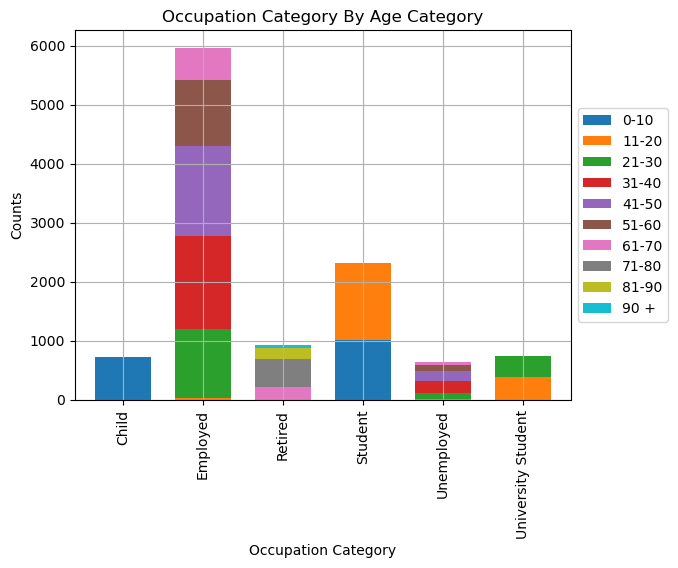

In [62]:
 # plot the cross tab in a stacked bar chart
age_occ4=pd.crosstab(census['Occupation Category'],census['Age Category'])
    
age_occ4.plot.bar(fill=True,grid=True,stacked=True,width=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Occupation Category By Age Category')
plt.ylabel('Counts')
plt.show()

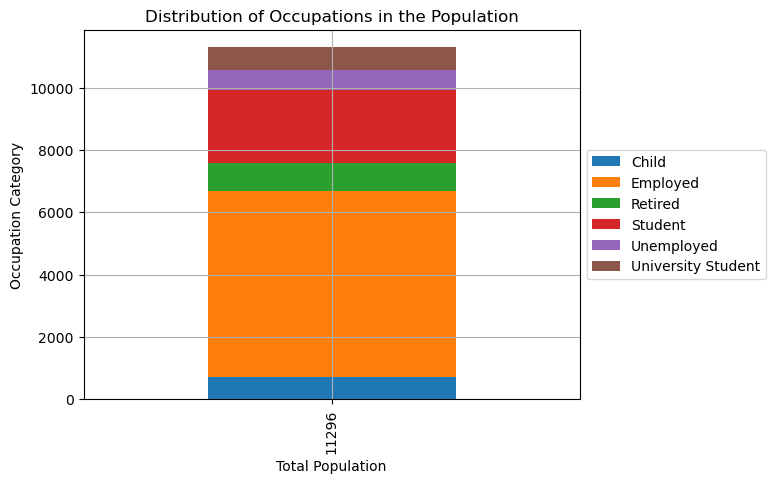

In [63]:
 # cross tab of occupation category in total population
dist_occ=pd.crosstab(len(census),census['Occupation Category'])
 # creating a stacked bar with it
dist_occ.plot.bar(stacked=True,fill=True,grid=True)
 # tuning the bar
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Occupations in the Population')
plt.xlabel("Total Population")
plt.ylabel("Occupation Category")
plt.show()

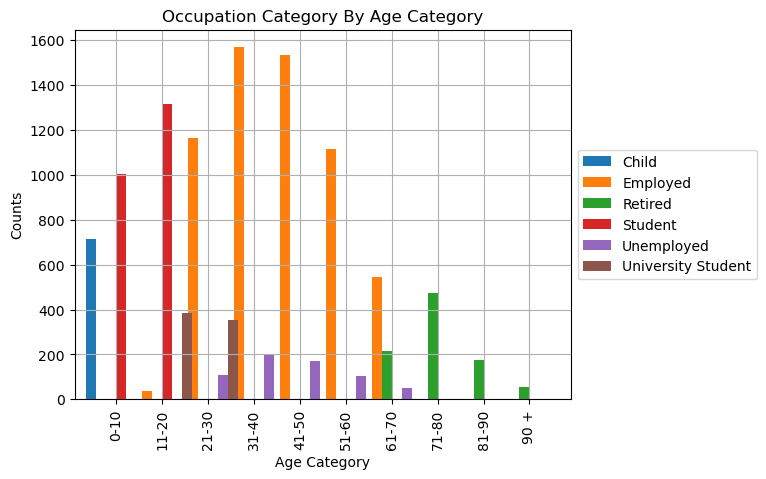

In [64]:
 # plot the cross tab in an unstacked bar chart

age_occ2=pd.crosstab(census['Age Category'],census['Occupation Category'])
age_occ2.plot.bar(grid=True,stacked=False,width=1.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Occupation Category By Age Category')
plt.ylabel('Counts')
plt.show()

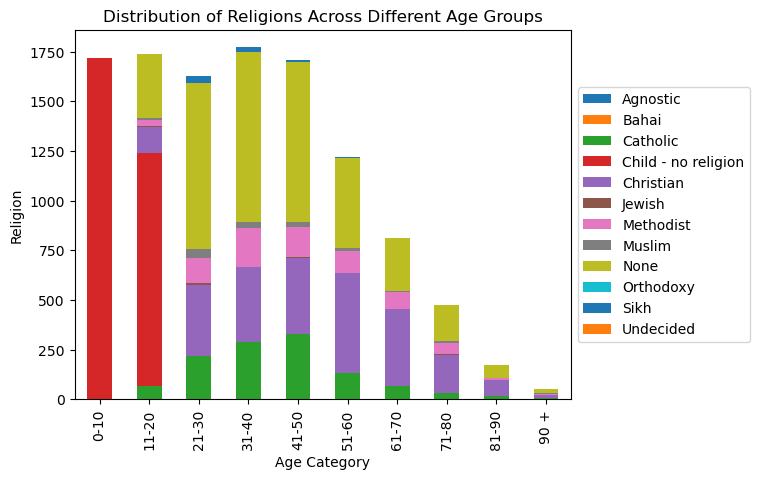

In [65]:
# get a crosstabulate view of age category and religion
rel_distri_age=pd.crosstab(census['Age Category'],census['Religion']) # fit in the variables
rel_distri_age.plot.bar(stacked=True) # creat a stacked bar chart from the table
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Religions Across Different Age Groups')  # set title
plt.xlabel("Age Category")  # set x axis
plt.ylabel("Religion") # set y axis
plt.show()

In [66]:
 # this chart shows the populatiion count against percentage population count against median age of each religion

     # set religion counts per religion
relage=census['Religion'].value_counts().to_frame()
 # rename column to total population
relage=relage.rename(columns={'Religion':'Total Population'})
 # add percentage column
relage['% Count']=round((relage['Total Population']/relage['Total Population'].sum())*100,1)
 # add median age column
relage['Median Age']=census.groupby(['Religion'])['Age'].median().to_frame()
relage

,Total Population,% Count,Median Age
None,3808,33.7,39.0
Child - no religion,2889,25.6,9.0
Christian,2426,21.5,49.0
Catholic,1158,10.3,41.0
Methodist,768,6.8,42.5
Muslim,142,1.3,32.0
Sikh,72,0.6,30.5
Jewish,29,0.3,42.0
Orthodoxy,1,0.0,29.0
Undecided,1,0.0,45.0


In [67]:
 # table of marital population by percentage and median ages
marital_=census['Marital Status'].value_counts().to_frame()
 # renaame counts column to total population
marital_=marital_.rename(columns={'Marital Status':'Total Population'})
 # create percentage and median agess columns
marital_['Percentage']=round((marital_['Total Population']/marital_['Total Population'].sum())*100,1)
marital_['Median Age']=census.groupby(['Marital Status'])['Age'].median().to_frame()

marital_=marital_.drop('NA') # drop NA
marital_

,Total Population,Percentage,Median Age
Single,4002,35.4,36.0
Married,2883,25.5,50.0
Divorced,1106,9.8,38.0
Widowed,416,3.7,69.0


In [68]:
 # create a table of gender, marital status and their mean ages
gend_marital_group = census.groupby(['Gender','Marital Status']) # group by gender & marital status

gend_marital_group['Age'].mean().to_frame()   # create mean ages column

Age
Gender Marital Status           
Female Divorced        41.892966
       Married         50.407331
       NA               8.912857
       Single          37.280644
       Widowed         63.683206
Male   Divorced        39.654867
       Married         52.282533
       NA               8.882471
       Single          36.887771
       Widowed         63.538961

In [69]:
 # create marital percentage in population between the geenders
marital_percentage_rates=pd.crosstab(census['Marital Status'],census['Gender'])
 # drop na - children
marital_percentage_rates=marital_percentage_rates.drop('NA',axis=0)

_all=marital_percentage_rates['Male']+marital_percentage_rates['Female']
 # create male and female columns
marital_percentage_rates['% of Females']=round((marital_percentage_rates['Female']/_all)*100,1)
marital_percentage_rates['% of Males']=round((marital_percentage_rates['Male']/_all)*100,1)
marital_percentage_rates

Gender,Female,Male,% of Females,% of Males
Marital Status,,,,
Divorced,654,452,59.1,40.9
Married,1446,1437,50.2,49.8
Single,2113,1889,52.8,47.2
Widowed,262,154,63.0,37.0


In [70]:
 # a view of 1 of the 4 most crowded houses in the town shows many lodgers 
census.loc[(census['Occupants']>21) & (census['Address']=='1 Cameron Springs')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Category,Occupation Category,Address,Occupants
694,1,Cameron Springs,Charlene,Price,46,Head,Divorced,Female,Unemployed,None,Christian,41-50,Unemployed,1 Cameron Springs,22
695,1,Cameron Springs,Emma,Price,10,Daughter,NA,Female,Student,None,Child - no religion,0-10,Student,1 Cameron Springs,22
696,1,Cameron Springs,David,Price,5,Son,NA,Male,Student,None,Child - no religion,0-10,Student,1 Cameron Springs,22
697,1,Cameron Springs,Francis,Price,3,Son,NA,Male,Child,None,Child - no religion,0-10,Child,1 Cameron Springs,22
698,1,Cameron Springs,Linda,Price,2,Daughter,NA,Female,Child,None,Child - no religion,0-10,Child,1 Cameron Springs,22
699,1,Cameron Springs,Liam,Smith,33,Lodger,Single,Male,Secretary/administrator,None,Methodist,31-40,Employed,1 Cameron Springs,22
700,1,Cameron Springs,Karl,Reeves,36,Lodger,Divorced,Male,Product manager,None,Methodist,31-40,Employed,1 Cameron Springs,22
701,1,Cameron Springs,Melissa,Greenwood,28,Lodger,Single,Female,Accommodation manager,None,None,21-30,Employed,1 Cameron Springs,22
702,1,Cameron Springs,Oliver,Gregory,52,Cousin,Single,Male,Hospital pharmacist,None,Christian,51-60,Employed,1 Cameron Springs,22
703,1,Cameron Springs,Karl,Roberts,58,Lodger,Divorced,Male,"Surveyor, hydrographic",None,Muslim,51-60,Employed,1 Cameron Springs,22


<AxesSubplot:ylabel='Occupants'>

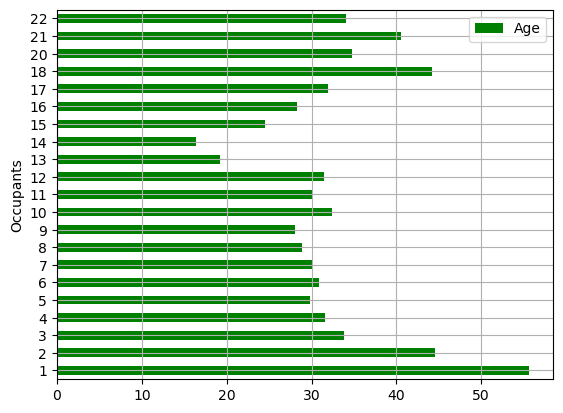

In [71]:
 # table of occupants by mean age
age_of_occup=census.groupby(['Occupants'])
age_of_occup['Age'].mean().plot.barh(grid=True,color='green',legend=True)


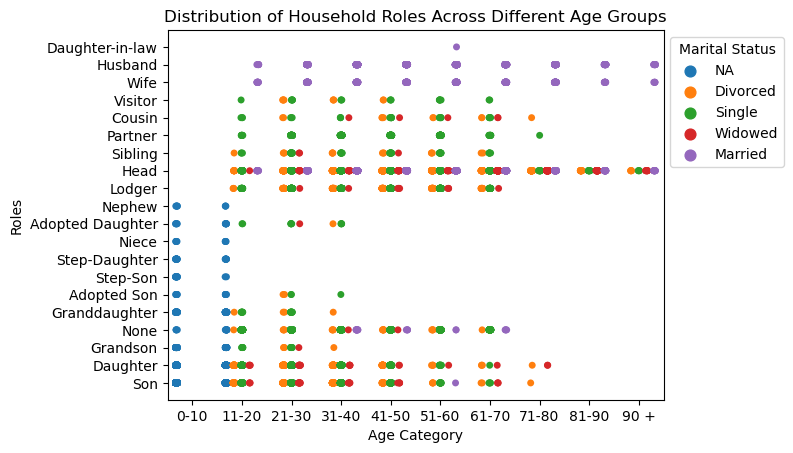

In [72]:
 # distribution of household roles across age categories
ds=census.sort_values(by='Age Category',ascending=True)

head_marital_status=sns.stripplot(data=ds,x='Age Category',y='Relationship to Head of House',dodge=True,hue='Marital Status')
sns.move_legend(head_marital_status, "upper left", bbox_to_anchor=(1, 1))
plt.title('Distribution of Household Roles Across Different Age Groups')
plt.xlabel("Age Category")
plt.ylabel("Roles")
plt.show()

In [73]:
census.info()  # new census df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11296 non-null  int32 
 1   Street                         11296 non-null  object
 2   First Name                     11296 non-null  object
 3   Surname                        11296 non-null  object
 4   Age                            11296 non-null  int64 
 5   Relationship to Head of House  11296 non-null  object
 6   Marital Status                 11296 non-null  object
 7   Gender                         11296 non-null  object
 8   Occupation                     11296 non-null  object
 9   Infirmity                      11296 non-null  object
 10  Religion                       11296 non-null  object
 11  Age Category                   11296 non-null  object
 12  Occupation Category            11296 non-null  object
 13  A

In [74]:
from pandas_profiling import ProfileReport
pf=ProfileReport(census)
pf.to_file("Census_data.html")
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]